<a href="https://colab.research.google.com/github/gulabpatel/Anomaly_Detection_Python/blob/main/4%3A%20KNN_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

**Data preparation**

In [2]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
# input data
df = data[["sepal_length", "sepal_width"]]
df.sample(10)

,sepal_length,sepal_width
40,5.0,3.5
89,5.5,2.5
19,5.1,3.8
77,6.7,3.0
13,4.3,3.0
71,6.1,2.8
85,6.0,3.4
24,4.8,3.4
125,7.2,3.2
143,6.8,3.2


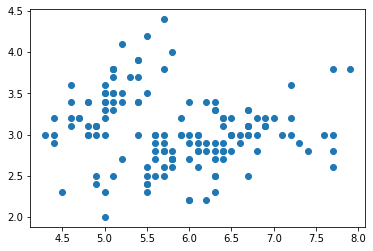

In [3]:
# scatterplot of inputs data
plt.scatter(df["sepal_length"], df["sepal_width"])

In [4]:
# create arrays
X = df.values

**Modeling**


The key parameter in kNN is n_neighbors, which determines the number of neighbors to use for calculating distances from the point of measurement.

In [5]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

**anomaly detection**


Now that we have fitted the model, it’s time to extract model outputs—(a) distances between data points and (b) associated index values — that can be used for detecting anomalies.

In [6]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
distances, indexes

(array([[0.        , 0.        , 0.1       ],
        [0.        , 0.1       , 0.1       ],
        [0.        , 0.        , 0.1       ],
        [0.        , 0.1       , 0.14142136],
        [0.        , 0.1       , 0.1       ],
        [0.        , 0.        , 0.2       ],
        [0.        , 0.2       , 0.2       ],
        [0.        , 0.        , 0.1       ],
        [0.        , 0.1       , 0.14142136],
        [0.        , 0.        , 0.        ],
        [0.        , 0.1       , 0.2       ],
        [0.        , 0.        , 0.2       ],
        [0.        , 0.        , 0.1       ],
        [0.        , 0.1       , 0.14142136],
        [0.        , 0.2236068 , 0.36055513],
        [0.        , 0.28284271, 0.41231056],
        [0.        , 0.        , 0.2       ],
        [0.        , 0.        , 0.1       ],
        [0.        , 0.2236068 , 0.31622777],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.14142136],
        [0.        , 0.1       , 0

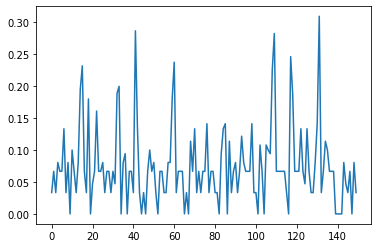

In [7]:
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

As we can see, there are some spikes in distance measures, and these spikes are potentially anomalies or outliers in the dataset.
Now comes one of the most important decisions for data scientists — determining the cutoff value to filter anomalies.
As we see in the figure above, some cutoff possibilities are — 0.25, 0.20, 0.15 (y-axis), each filtering a progressively higher number of outliers.
For this demo, let’s be generous and choose 0.15 as the cutoff to get more outliers. The reason for being generous is to be able to further examine the data so we are not missing outlier.

In [8]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.15)
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

In [9]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


**Plotting anomalies**


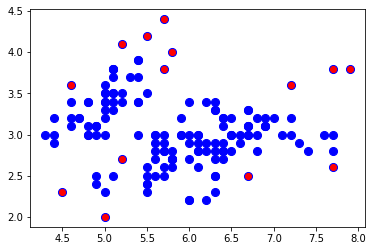

In [10]:
# plot data
plt.scatter(df["sepal_length"], df["sepal_width"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], color = "r")

A real-world implementation would require much more experimentation to find out what works and what doesn’t for a particular context and industry. A step further to examine and re-examine the filter data points to double-check with other tools or domain experts.